
# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>


# Introduction

### Dataset Description 

 
> This is a data analysis project using Medical Appointment No Shows dataset . 

> dataset collect information from 100k medical appointment 
in Brazil and its focused on the question of whether or not paitients show up for their appointment 


### **Questions for Analysis**
> 1. what is the top 20 Neighbourhood for old people ?
> 2. How many people have an appointment at each age ?
> 3. The Number of male VS female 
> 4. what is the number of male and female in (Diabetes,Hipertension,Handcap,Alcoholism)?
> 5. How SMS_received affect the showing in the appointment ? 
> 6. what is the popular age for all disease ? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
% matplotlib inline


UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
# Data Wrangling

In [2]:
df = pd.read_csv("KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



## **Cleaning for Analysis**

> 1. Change the datatype of some columns 
> 2. Remove Useless column
> 3. Remove duplicate values
> 4. Remove wrong values 
 


>### change ScheduledDay and AppointmentDay from integer to datetime

In [4]:
df["ScheduledDay"]=pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"]=pd.to_datetime(df["AppointmentDay"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

>### Remove PatientId and AppointmentID columns

In [5]:
del_col=['PatientId','AppointmentID']
df.drop(del_col,1,inplace=True)
df.head()

C:\Users\AMIRA\AppData\Local\Temp\ipykernel_15264\2894238944.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(del_col,1,inplace=True)


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>### Remove Duplicates rows

In [6]:
df.drop_duplicates()
df.shape

(110527, 12)

>### Remove Wrong ages with minus values

In [7]:
df=df[df['Age']>=0]
df.shape

(110526, 12)

<a id='eda'></a>
# Exploratory Data Analysis

In [8]:
dff=df['Neighbourhood'].value_counts()
dff

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

## what is the top 20 Neighbourhood for old people ?

(40.0, 60.0)

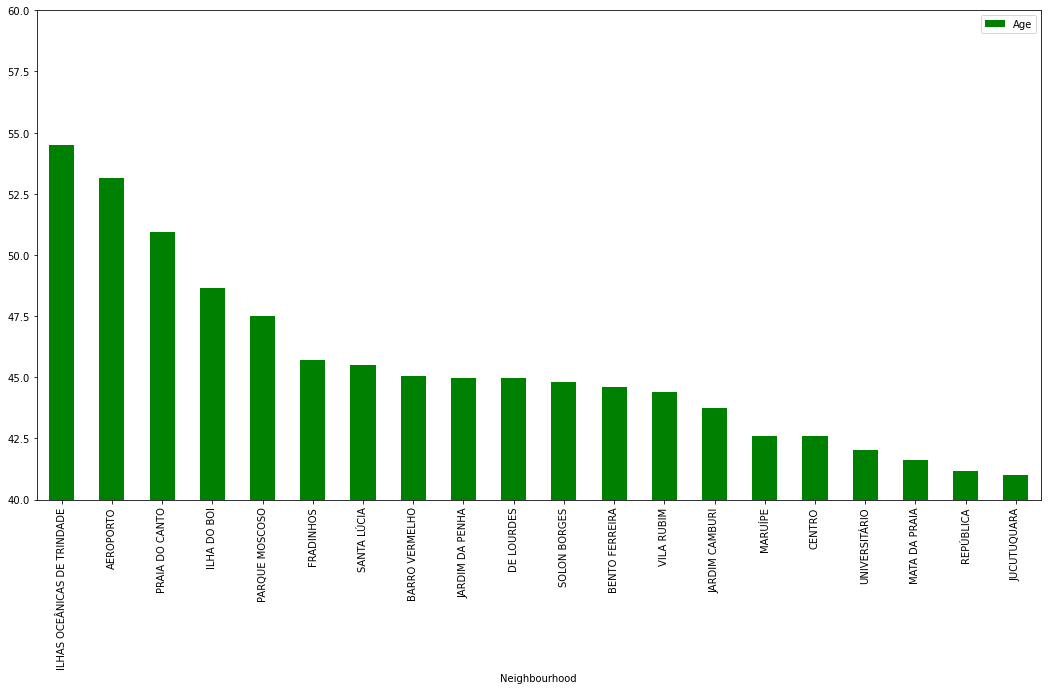

In [9]:
x=df[['Age','Neighbourhood']].groupby('Neighbourhood').mean().sort_values('Age',ascending =False).head(20)

x.plot(kind='bar',figsize=(18,9),color='green')
x = x.reset_index(level=0)
plt.ylim(40, 60)


## How many people have an appointment at each age ?


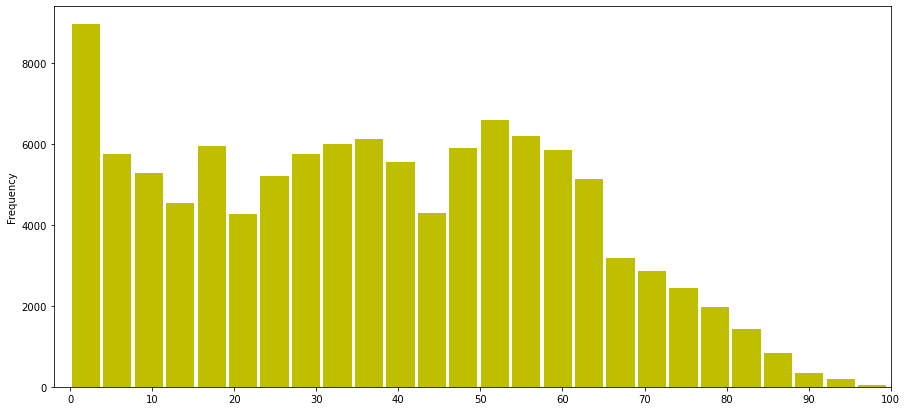

In [10]:
df['Age'].plot(kind='hist',rwidth = 0.9,figsize=(15,7),bins=30,color='y')
plt.xlim(-2, 100)
plt.xticks(np.arange(0, 101, step=10))
plt.show()

## The Number of male VS female 

<AxesSubplot:ylabel='Gender'>

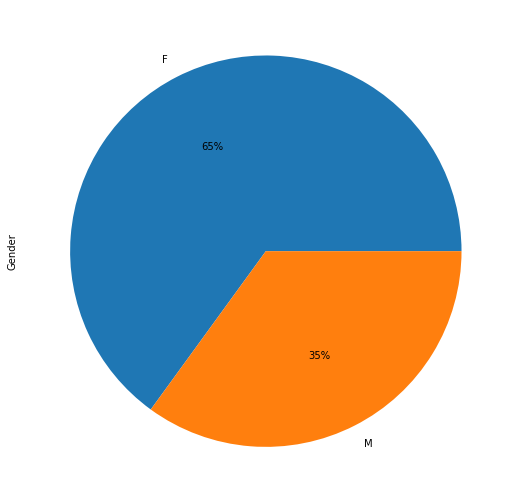

In [11]:
df['Gender'].value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(10,9))

## what is the number of male and female in (Diabetes,Hipertension,Handcap,Alcoholism)?

In [12]:
def replace_numbers(col,n):
    name=df[df[col]==1]
    name[col].replace({1: n}, inplace=True)
    
    return name
        
Diabetes_True=replace_numbers('Diabetes',1)
Diabetes_True
Hipertension_True=replace_numbers('Hipertension',2)
Handcap_True=replace_numbers('Handcap',3)
Alcoholism_True=replace_numbers('Alcoholism',4)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


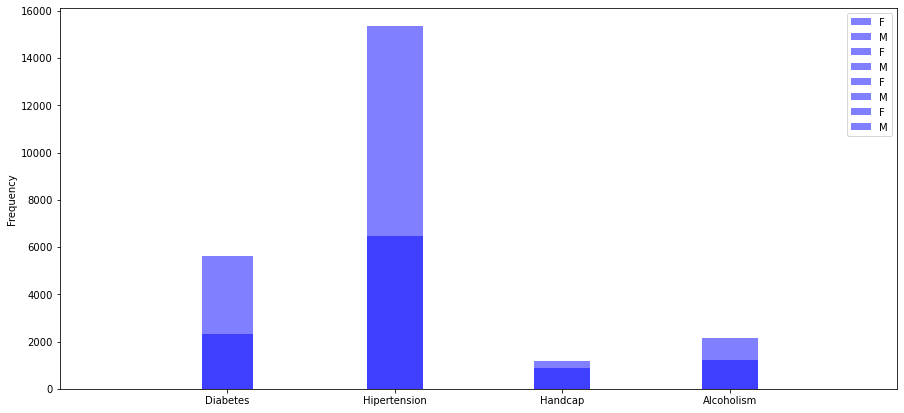

In [13]:

#color_list=['b','r']

Diabetes_True.groupby('Gender')['Diabetes'].plot(kind='hist',alpha=0.5,color='b',figsize=(15,7),bins=3,rwidth = 0.9)
Hipertension_True.groupby('Gender')['Hipertension'].plot(kind='hist',alpha=0.5,color='b',bins=3)
Handcap_True.groupby('Gender')['Handcap'].plot(kind='hist',alpha=0.5,color='b',bins=3)
Alcoholism_True.groupby('Gender')['Alcoholism'].plot(kind='hist',alpha=0.5,color='b',bins=3)
plt.xlim(0,5)
plt.xticks(np.arange(1,5,1),["Diabetes","Hipertension","Handcap","Alcoholism"])
plt.legend()
plt.show()

## How SMS_received affect the showing in the appointment ? 

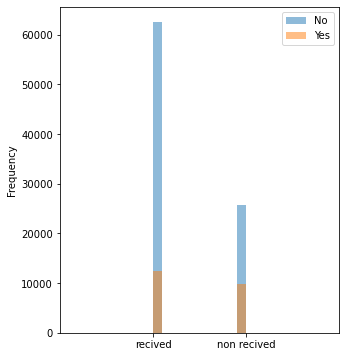

In [14]:
df.groupby('No-show')['SMS_received'].plot(kind='hist',alpha=0.5,figsize=(5,6),rwidth = 1.2)

####error with rwidth
plt.xlim(-1,2)

plt.xticks(np.arange(0,2,1),['recived','non recived'])

plt.legend()

## what is the popular age for all disease ? 

In [15]:
print("the popular of Age of people have Diabetes ",Diabetes_True['Age'].value_counts().idxmax())
print("the popular of Age of people have Hipertension ",int(Hipertension_True['Age'].value_counts().idxmax()))
print("the popular of Age of people have Handcap ",int(Handcap_True['Age'].value_counts().idxmax()))
print("the popular of Age of people have Alcoholism ",int(Alcoholism_True['Age'].value_counts().idxmax()))

the popular of Age of people have Diabetes  66
the popular of Age of people have Hipertension  56
the popular of Age of people have Handcap  57
the popular of Age of people have Alcoholism  63
